As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. 

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher.

Here we will use **principal component analysis** (PCA; see In Depth: Principal Component Analysis), which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.


In [1]:
# load iris dataset
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# create a feature matrix
X_iris = iris.drop('species', axis=1)

In [5]:
# Dimensionality Reduction
from sklearn.decomposition import PCA
model = PCA(n_components=2) # Instantiate the model with hyperparameters
model.fit(X_iris) # Fit to data.
X_2D = model.transform(X_iris) # Transform the data to two dimension

In [6]:
X_iris.shape

(150, 4)

In [7]:
X_2D.shape

(150, 2)

Now let's plot the results. A quick way to do this is to insert the results into the original `Iris DataFrame`, and use`Seaborn's` lmplot to show the results:

In [11]:
iris['PC1'] = X_2D[:, 0]
iris['PC2'] = X_2D[:, 1]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,PC1,PC2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,-2.728717,0.326755


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


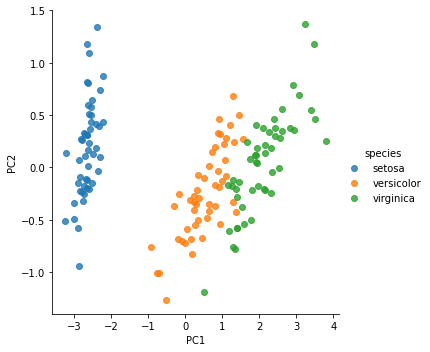

In [12]:
sns.lmplot("PC1", "PC2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels.